In [13]:
# Resturant Review Analysis using NLP
# Author - Suman Das
# Date - 18/05/2024

In [14]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [15]:
from textblob import TextBlob

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
from googletrans import Translator

In [18]:
import speech_recognition as sr

In [19]:
import webbrowser as wb

In [20]:
r=sr.Recognizer()

In [21]:
edge_path='C:/Program Files (x86)/Microsoft/Edge/Application/msedge.exe %s'

In [22]:
class clsResturant():
    def __init__(self,restname):
        self.strRestName=restname
    def FuncResturant(self):
        if(self.strRestName.upper()=='HALDIRAM'):
            rest_text='https://www.zomato.com/ncr/haldirams-connaught-place-new-delhi/reviews'
        elif(self.strRestName.upper()=='DANA CHOGA'):
            rest_text='https://www.zomato.com/ncr/dana-choga-dlf-phase-1/reviews'
        elif(self.strRestName.upper()=='IMPERFECTO'):
            rest_text='https://www.zomato.com/ncr/imperfecto-indirapuram-ghaziabad/reviews'
        elif(self.strRestName.upper()=='SUBWAY'):
            rest_text='https://www.zomato.com/ncr/subway-phi-3-greater-noida/reviews'
        elif(self.strRestName.upper()=='BURGER KING'):
            rest_text='https://www.zomato.com/ncr/burger-king-sector-63-noida/reviews'
        return rest_text

In [23]:
with sr.Microphone() as source:
    print('Please tell Resturant Name !')
    audio=r.listen(source,0,3)
    print('Done')
try:
    text=r.recognize_google(audio)
    print('google thinks you said : ' + text)
    print(' ')
    objResturant=clsResturant(text)
    f_text=objResturant.FuncResturant()
    
    #wb.get(edge_path).open(f_text)
    from urllib.request import Request, urlopen
    req = Request(f_text, headers={'User-Agent': 'XYZ/3.0'})
    webpage = urlopen(req, timeout=10).read()

    print(webpage)
    
    
except Exception as e:
    print(e)

Please tell Resturant Name !
Done
google thinks you said : Haldiram
 
b'\n    <!DOCTYPE html>\n    <html>\n      <head>\n      <meta name="viewport" content="width=device-width, initial-scale=1">\n      <link rel="preconnect" href="https://googleads.g.doubleclick.net">\n      <link rel="preconnect" href="https://jumbo.zomato.com">\n      <link rel="preconnect" href="https://accounts.google.com">\n      <link rel="preconnect" href="https://securepubads.g.doubleclick.net">\n      <link rel="preconnect" href="https://www.google-analytics.com">\n      <link rel="preconnect" href="https://www.googleadservices.com">\n      <link rel="preconnect" href="https://bat.bing.com">\n      <link rel="preconnect" href="https://8391443.fls.doubleclick.net">\n      <title data-rh="true">Reviews of Haldiram&#x27;s, Connaught Place, New Delhi | Zomato </title>\n      <meta data-rh="true" charset="utf-8"/><meta data-rh="true" name="robots" content="NOODP,NOYDIR"/><meta data-rh="true" name="description" con

In [24]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(webpage)
format_text=soup.get_text(strip=True)
print(format_text)

Reviews of Haldiram's, Connaught Place, New Delhi | Zomatolocation-filldown-trianglecurrent-locationDetect current locationUsing GPSSearchLog inSign upHome/India/Delhi NCR/Central Delhi/Connaught Place/Middle Circle, Connaught Place/Haldiram's/Haldiram's reviews/View GalleryHaldiram's4.0star-fill2,287Dining Ratings4.3star-fill2,410Delivery RatingsNorth Indian,South Indian,Street Food,MithaiMiddle Circle, Connaught Place, New DelhiClosedOpens at 9aminfo-linedirection-lineDirectionbookmark-addBookmarkshareShareOverviewOrder OnlineReviewsPhotosMenuHaldiram's ReviewsAll Reviewsdown-triangleinstructionNewest Firstdown-triangleNitiin78reviews17FollowersFollow1star-fillDINING15 days agowe ordered Raj kachori and Chole  bhature. Very unhygienic. there was a fly inside raj kachouri0Votes for helpful,0Commentsthumb-upHelpfulchatCommentshareShareShubhi Gangele56reviews143FollowersFollow3star-fillDINING22 days agoAlthough the food here tastes great, service is a big issue. The take a lot of time t

In [25]:
negetive=0
neutral=0
positive=0
compound=0
keys=['Negetive','Neutral','Positive','Compound']
values=[]

review_sentance=sent_tokenize(format_text)
#print(len(review_sentance))
for each_sent in review_sentance:
    #print(each_sent)
    sid=SentimentIntensityAnalyzer()

    score=sid.polarity_scores(each_sent)
    if score["neg"]!=0:
        negetive+=1
    else:
        if((score["neu"]>score["pos"]) & (score["neu"]>score["compound"])):
            neutral+=1
        elif((score["pos"]>score["neu"]) & (score["pos"]>score["compound"])):
           positive+=1
        elif((score["compound"]>score["neu"]) & (score["compound"]>score["pos"])):
           compound+=1 
    
    
    print(score)
#print("Negetive", negetive)
values.append(negetive)
#print("Neutral", neutral)
values.append(neutral)
#print("positive", positive)
values.append(positive)
#print("Compound", compound)
values.append(compound)
#print(keys)
#print(values)

sentiment = {}
 
# adding items to the dictionary using a loop
for i in range(len(keys)):
    sentiment.update({keys[i]: values[i]})

print(sentiment)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compound': -0.2263}
{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.5563}
{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5849}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.25, 'neu': 0.677, 'pos': 0.074, 'compound': -0.7356}
{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'compound': -0.8109}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.4728}
{'neg': 0.02, 'neu': 0.909, 'pos': 0.072, 'compound': 0.7964}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'Nege

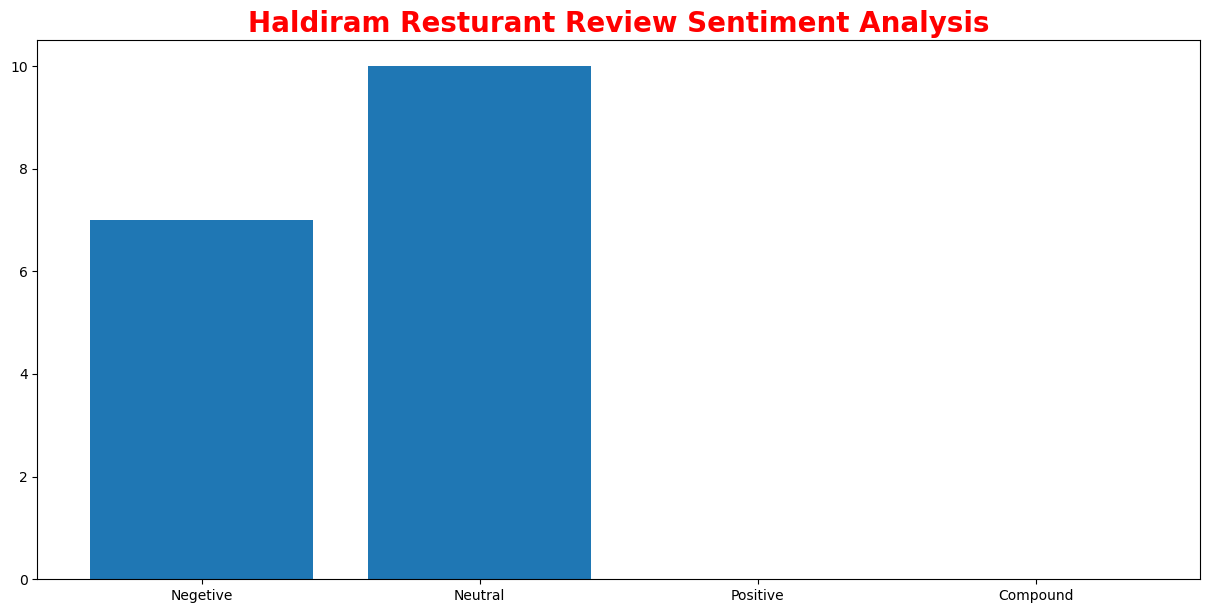

In [26]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,7))
str=text+" Resturant Review Sentiment Analysis"
#print(str)
plt.title(str,color='red',fontweight='bold',size=20)
plt.bar(*zip(*sentiment.items()))
plt.show()